# TASK #1: UNDERSTAND THE PROBLEM STATEMENT

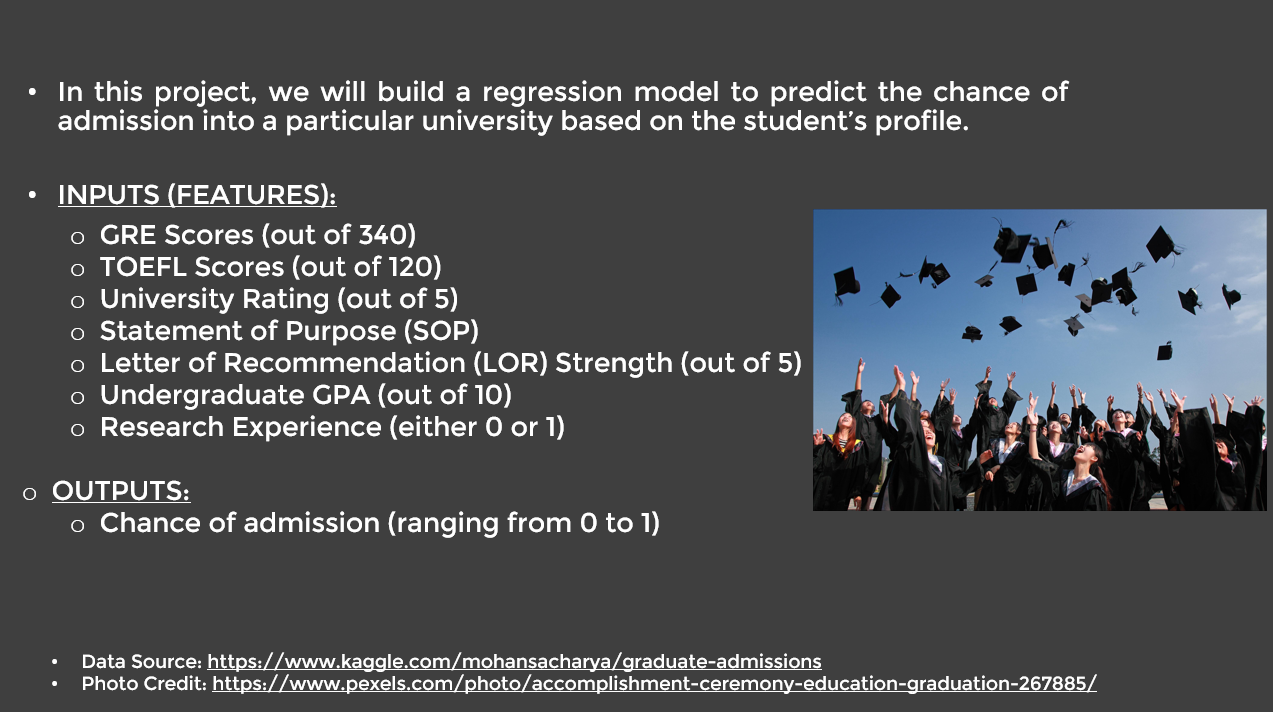

# TASK #2: IMPORT LIBRARIES AND DATASET

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [2]:
# read the csv file 
admission_df = pd.read_csv('Admission_Predict.csv')

In [3]:
admission_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
# Let's drop the serial no.
admission_df.drop('Serial No.', axis = 1, inplace = True)
admission_df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


# TASK #3: PERFORM EXPLORATORY DATA ANALYSIS

In [5]:
# checking the null values
admission_df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [6]:
# Check the dataframe information
admission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [7]:
# Statistical summary of the dataframe
admission_df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [8]:
# Grouping by University ranking 
admission_df.sort_values('University Rating')


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
438,318,110,1,2.5,3.5,8.54,1,0.67
28,295,93,1,2.0,2.0,7.20,0,0.46
369,301,98,1,2.0,3.0,8.03,1,0.67
139,318,109,1,3.5,3.5,9.12,0,0.78
272,294,95,1,1.5,1.5,7.64,0,0.49
...,...,...,...,...,...,...,...,...
133,323,112,5,4.0,4.5,8.78,0,0.79
134,333,113,5,4.0,4.0,9.28,1,0.89
142,331,115,5,4.0,3.5,9.44,1,0.92
151,332,116,5,5.0,5.0,9.28,1,0.94


# TASK #4: PERFORM DATA VISUALIZATION

array([[<AxesSubplot:title={'center':'GRE Score'}>,
        <AxesSubplot:title={'center':'TOEFL Score'}>,
        <AxesSubplot:title={'center':'University Rating'}>],
       [<AxesSubplot:title={'center':'SOP'}>,
        <AxesSubplot:title={'center':'LOR '}>,
        <AxesSubplot:title={'center':'CGPA'}>],
       [<AxesSubplot:title={'center':'Research'}>,
        <AxesSubplot:title={'center':'Chance of Admit'}>, <AxesSubplot:>]],
      dtype=object)

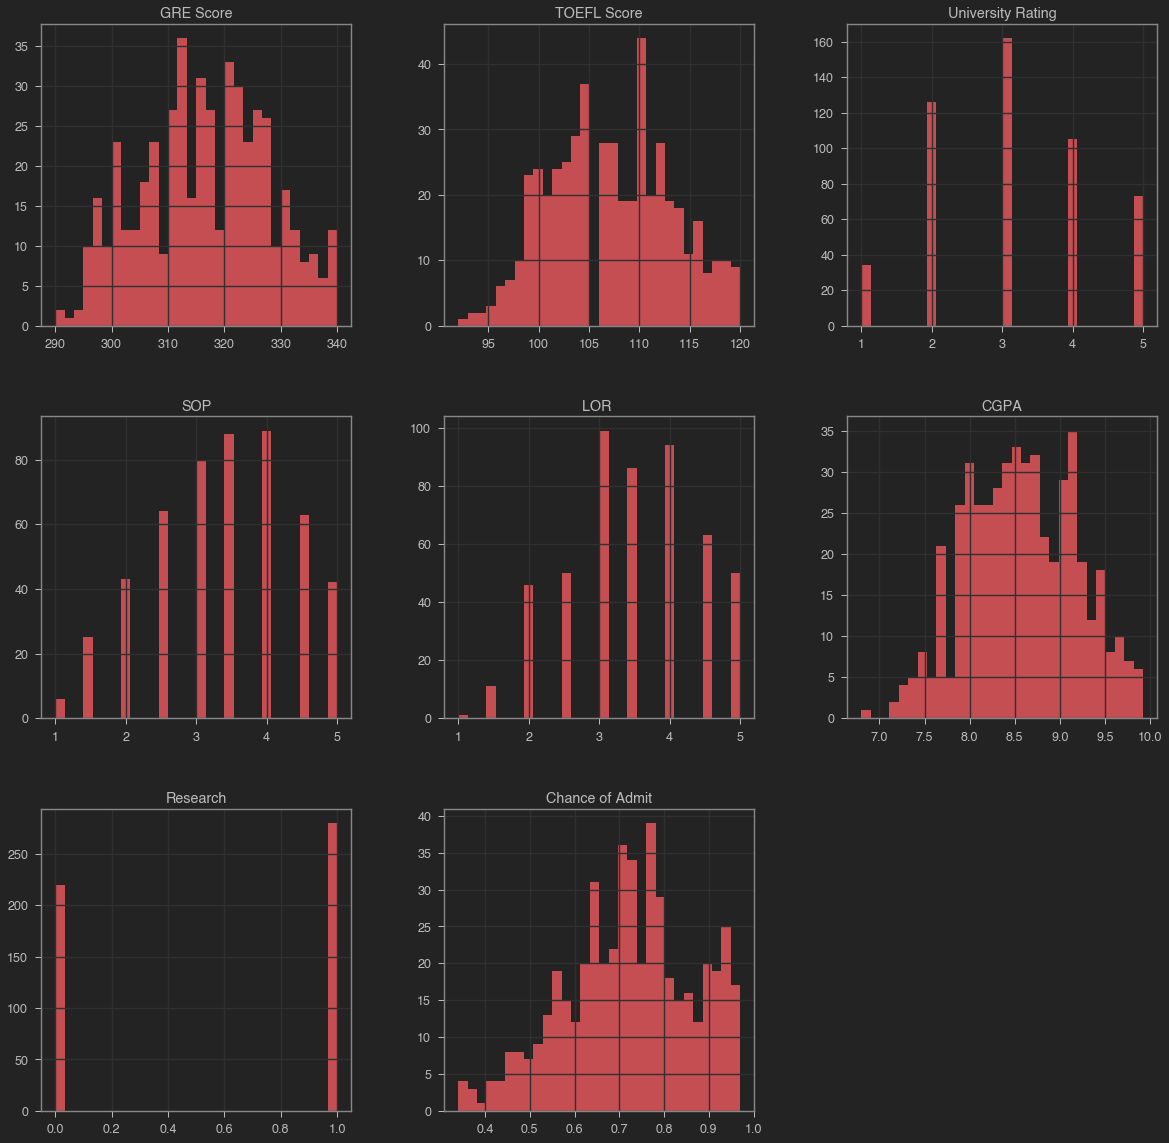

In [9]:
admission_df.hist(bins=30, color='r', figsize = (20,20))

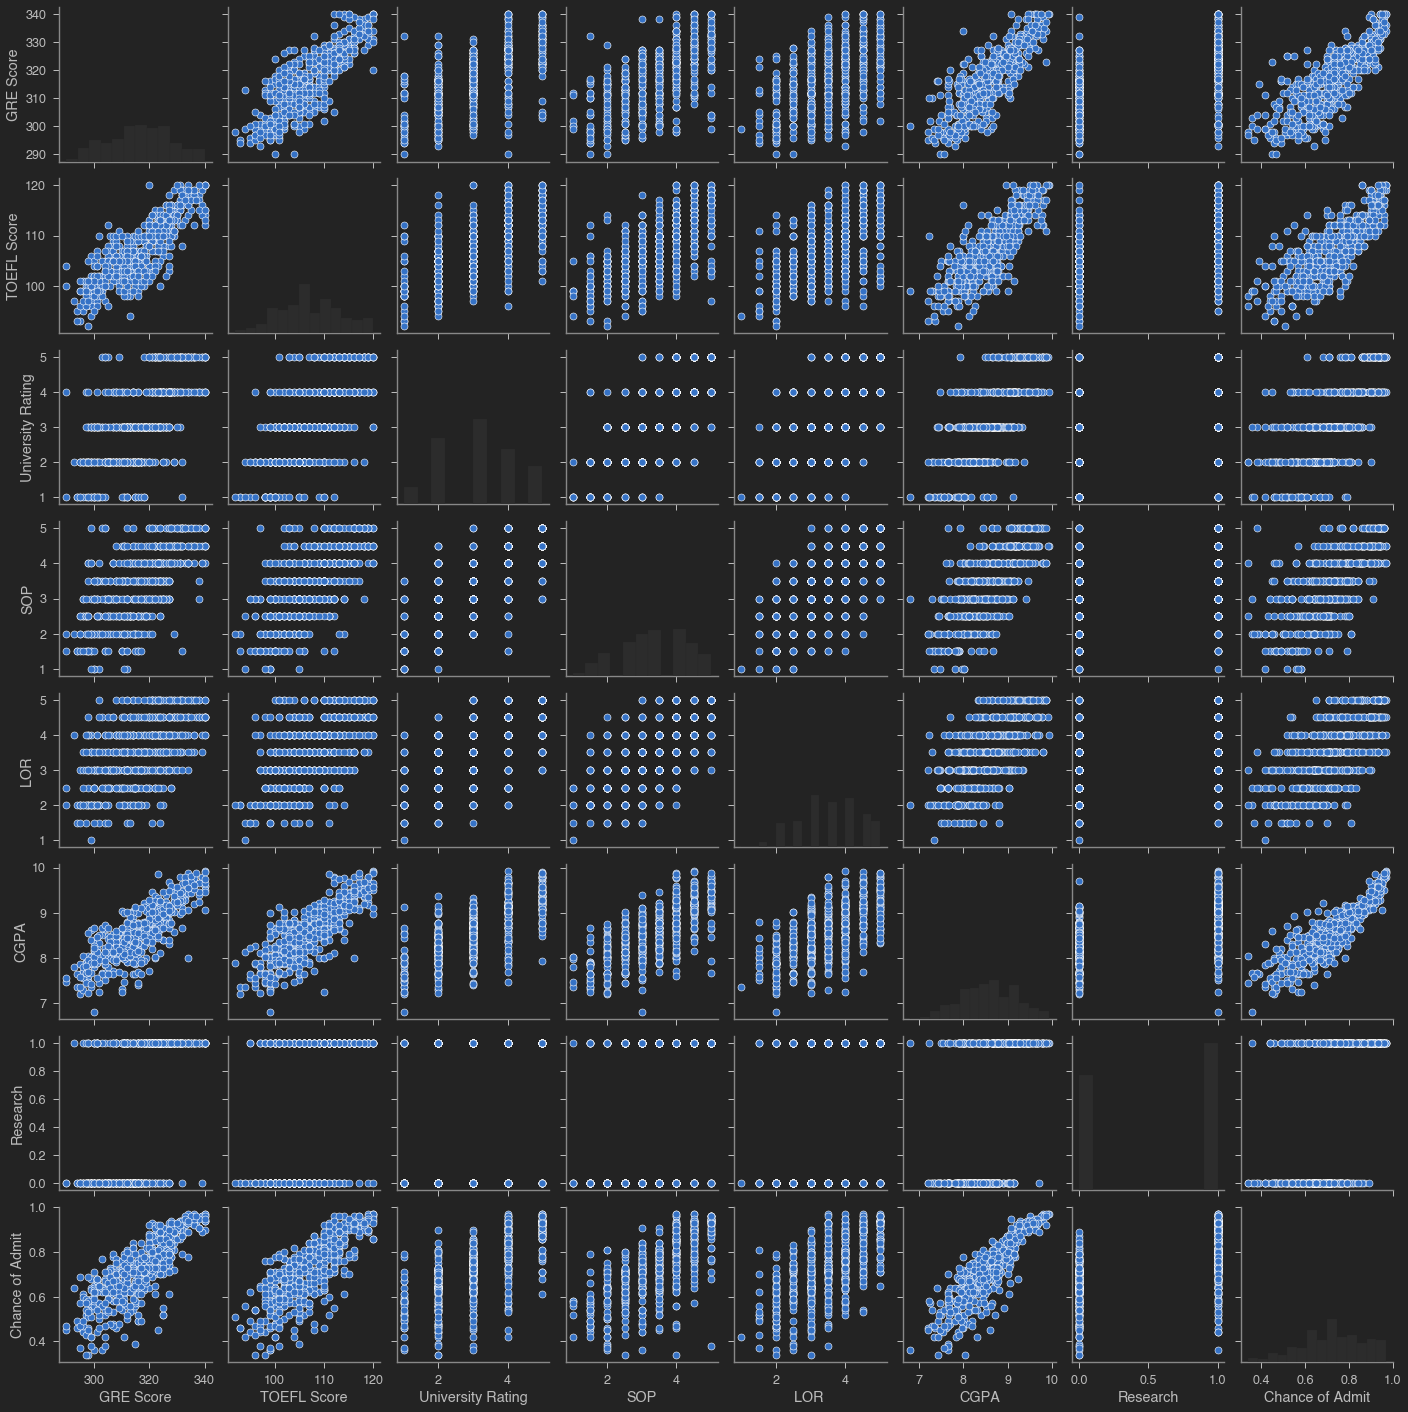

In [10]:
sns.pairplot(admission_df)
plt.show()

<AxesSubplot:>

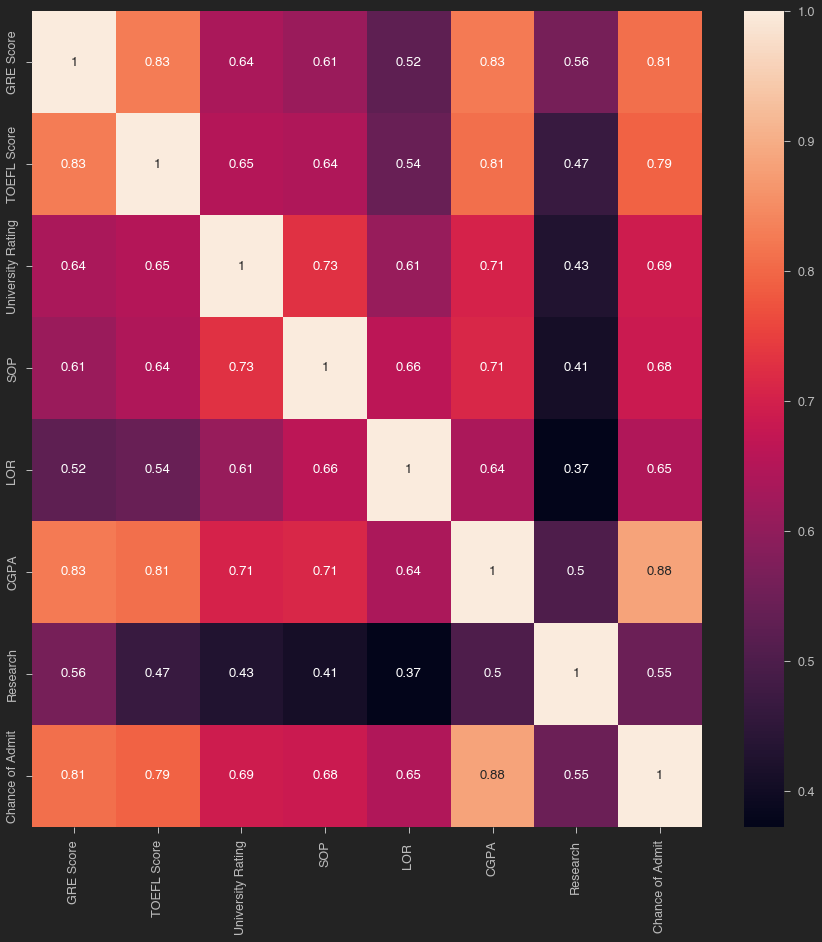

In [11]:
corr = admission_df.corr()
plt.figure(figsize=(15,15)) 
sns.heatmap(corr, annot=True)

# TASK #5: CREATE TRAINING AND TESTING DATASET

In [12]:
admission_df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [13]:
X = admission_df.drop('Chance of Admit', axis =1)

In [14]:
y = admission_df['Chance of Admit']

In [15]:
X.shape

(500, 7)

In [16]:
y.shape

(500,)

In [17]:
X=np.array(X)
y=np.array(y)

In [18]:
y=y.reshape(-1,1)
y.shape

(500, 1)

In [19]:
# scaling the data before training the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

In [20]:
# spliting the data in to test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15)

# TASK #6: TRAIN AND EVALUATE A LINEAR REGRESSION MODEL

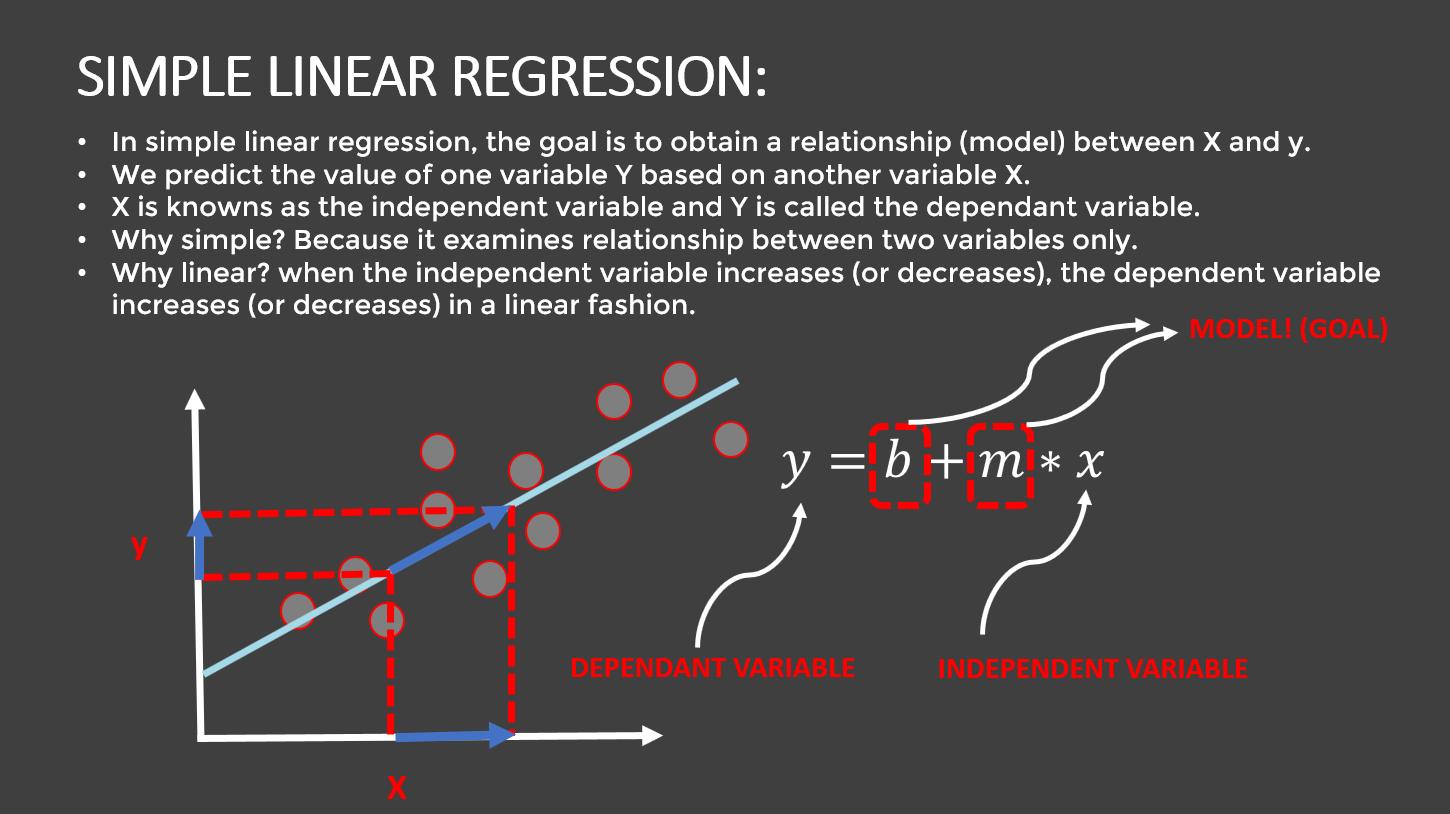

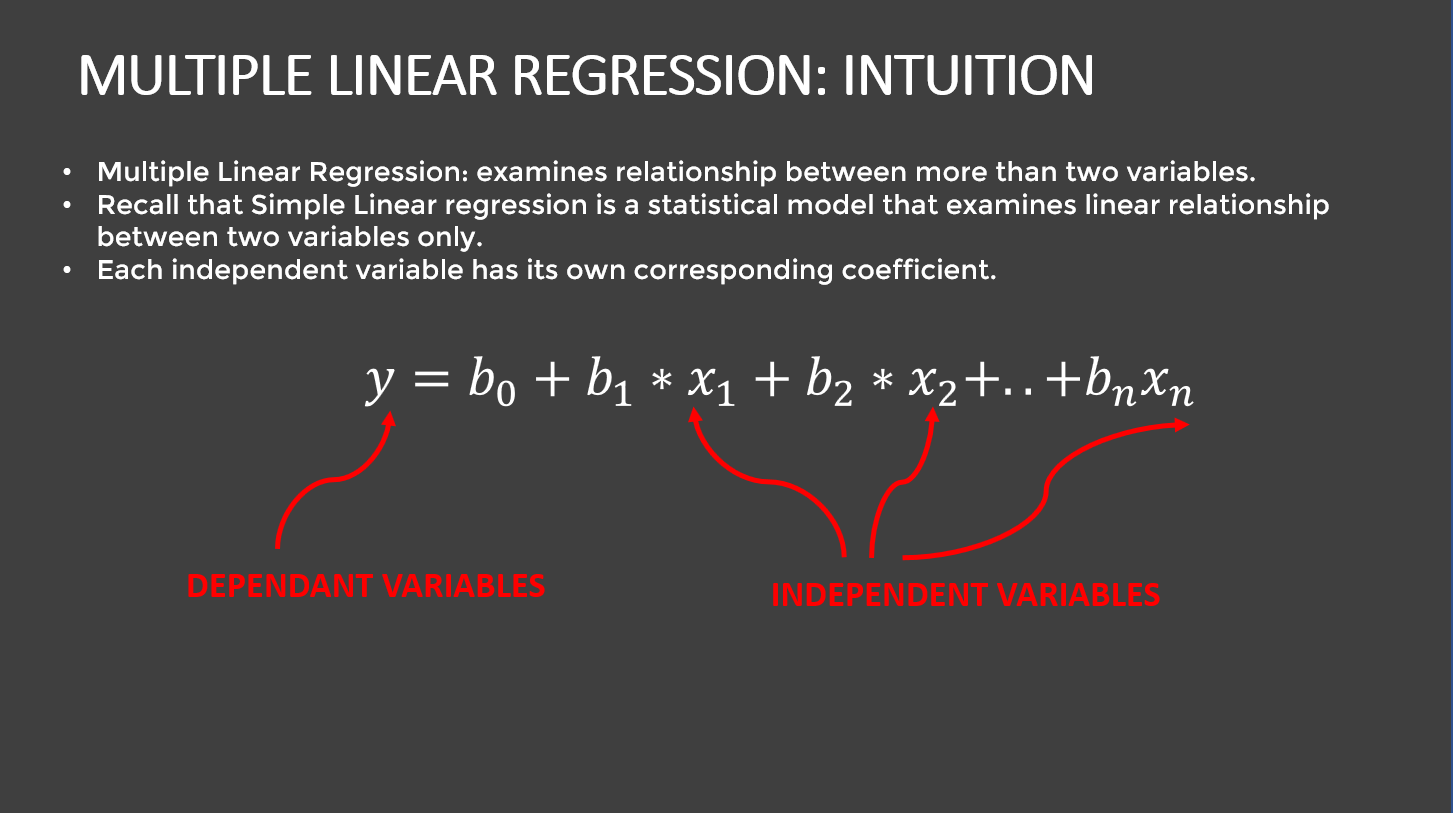

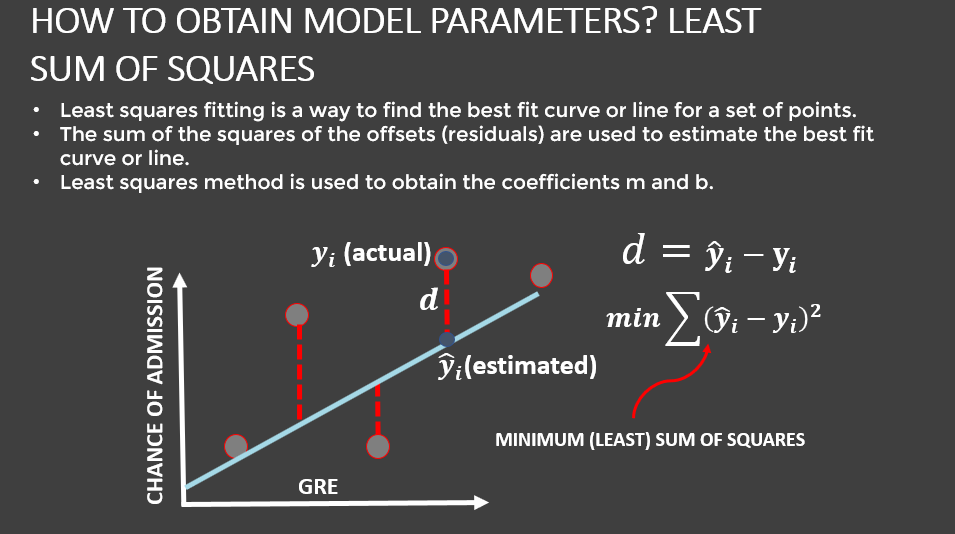

In [21]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, accuracy_score

In [22]:
LinearRegression_model = LinearRegression()
LinearRegression_model.fit(X_train, y_train)

LinearRegression()

In [23]:
accuracy_LinearRegression = LinearRegression_model.score(X_test,y_test)
accuracy_LinearRegression

0.8355742823715696

# TASK #7: TRAIN AND EVALUATE AN ARTIFICIAL NEURAL NETWORK

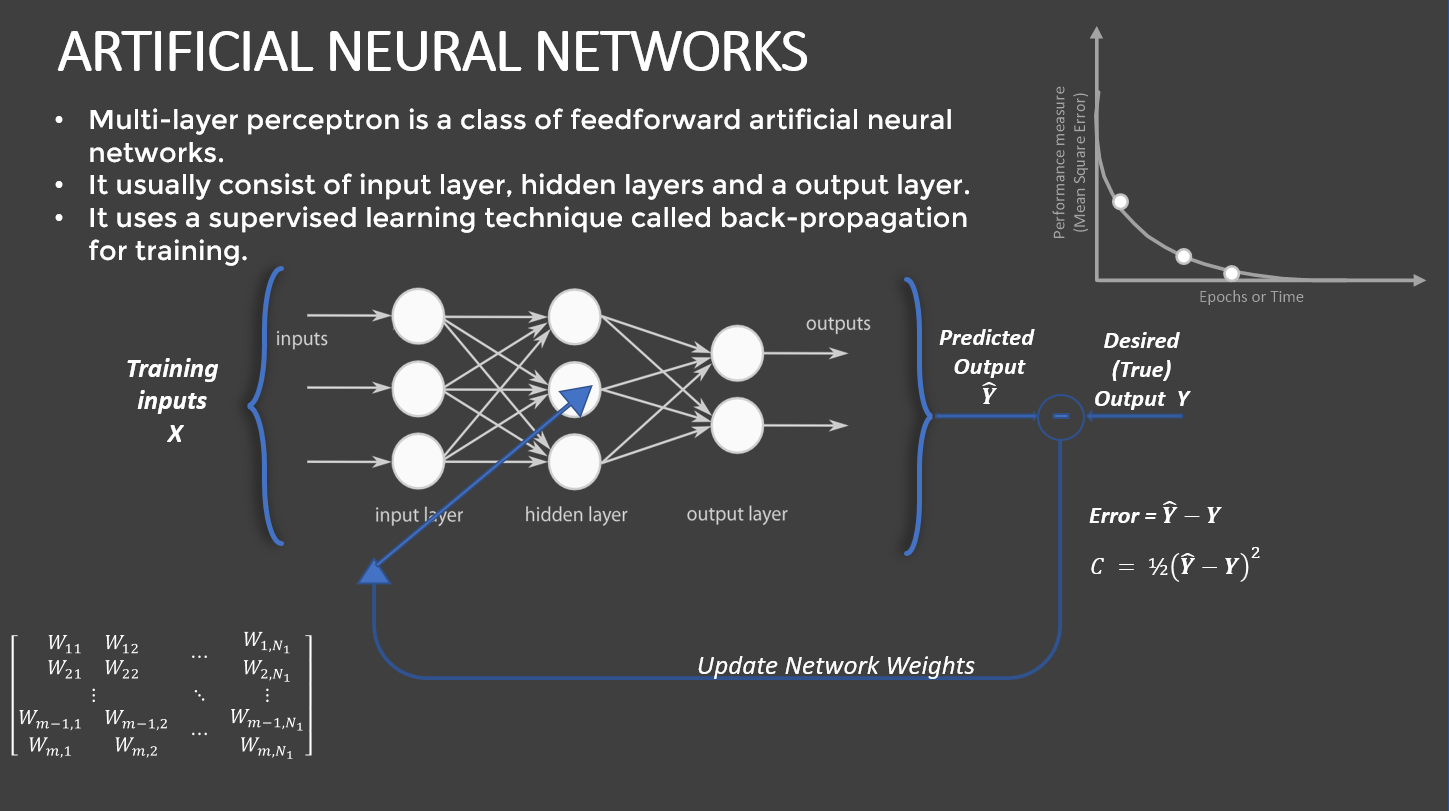

In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam


In [25]:
ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim = 7))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))
ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                400       
_________________________________________________________________
activation (Activation)      (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 150)               7650      
_________________________________________________________________
activation_1 (Activation)    (None, 150)               0         
_________________________________________________________________
dropout (Dropout)            (None, 150)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 150)               22650     
_________________________________________________________________
activation_2 (Activation)    (None, 150)               0

2021-10-23 10:12:50.313875: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-23 10:12:50.314382: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [26]:
ANN_model.compile(optimizer='Adam', loss='mean_squared_error')

In [27]:
epochs_hist = ANN_model.fit(X_train, y_train, epochs = 150, batch_size = 20, validation_split = 0.2)

Train on 340 samples, validate on 85 samples
Epoch 1/150
340/340 [==============================] - 1s 2ms/sample - loss: 0.5971 - val_loss: 0.2654
Epoch 2/150
340/340 [==============================] - 0s 325us/sample - loss: 0.3539 - val_loss: 0.3103
Epoch 3/150
340/340 [==============================] - 0s 326us/sample - loss: 0.2863 - val_loss: 0.2429
Epoch 4/150
340/340 [==============================] - 0s 332us/sample - loss: 0.2604 - val_loss: 0.2497
Epoch 5/150
340/340 [==============================] - 0s 347us/sample - loss: 0.2709 - val_loss: 0.2426
Epoch 6/150
340/340 [==============================] - 0s 340us/sample - loss: 0.2373 - val_loss: 0.2492
Epoch 7/150
340/340 [==============================] - 0s 331us/sample - loss: 0.2620 - val_loss: 0.2570
Epoch 8/150
340/340 [==============================] - 0s 342us/sample - loss: 0.2196 - val_loss: 0.2520
Epoch 9/150
340/340 [==============================] - 0s 330us/sample - loss: 0.2348 - val_loss: 0.2573
Epoch 10/150

In [28]:
result = ANN_model.evaluate(X_test, y_test)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

75/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [29]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

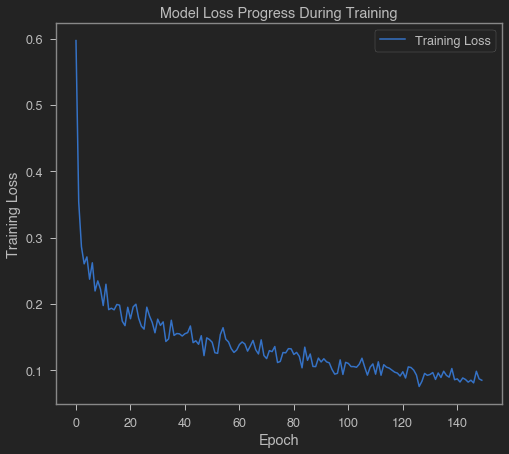

In [30]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

# TASK #8: TRAIN AND EVALUATE A DECISION TREE AND RANDOM FOREST MODELS

In [31]:
# Decision tree builds regression or classification models in the form of a tree structure. 
# Decision tree breaks down a dataset into smaller subsets while at the same time an associated decision tree is incrementally developed. 
# The final result is a tree with decision nodes and leaf nodes.
# Great resource: https://www.saedsayad.com/decision_tree_reg.htm



In [74]:
from sklearn.tree import DecisionTreeRegressor
DecisionTree_model = DecisionTreeRegressor()
DecisionTree_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [77]:
accuracy_DecisionTree = DecisionTree_model.score(X_test,y_test)
accuracy_DecisionTree

0.586294720840612

In [32]:
# Many decision Trees make up a random forest model which is an ensemble model. 
# Predictions made by each decision tree are averaged to get the prediction of random forest model.
# A random forest regressor fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 


In [78]:
from sklearn.ensemble import RandomForestRegressor
RandomForest_model = RandomForestRegressor(n_estimators=100, max_depth=10)
RandomForest_model.fit(X_train,y_train)

/Users/parthshinde/opt/anaconda3/envs/tensorflow_sessions/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(max_depth=10)

In [79]:
accuracy_RandomForest = RandomForest_model.score(X_test, y_test)
accuracy_RandomForest

0.8167164563087705

# TASK #9: UNDERSTAND VARIOUS REGRESSION KPIs

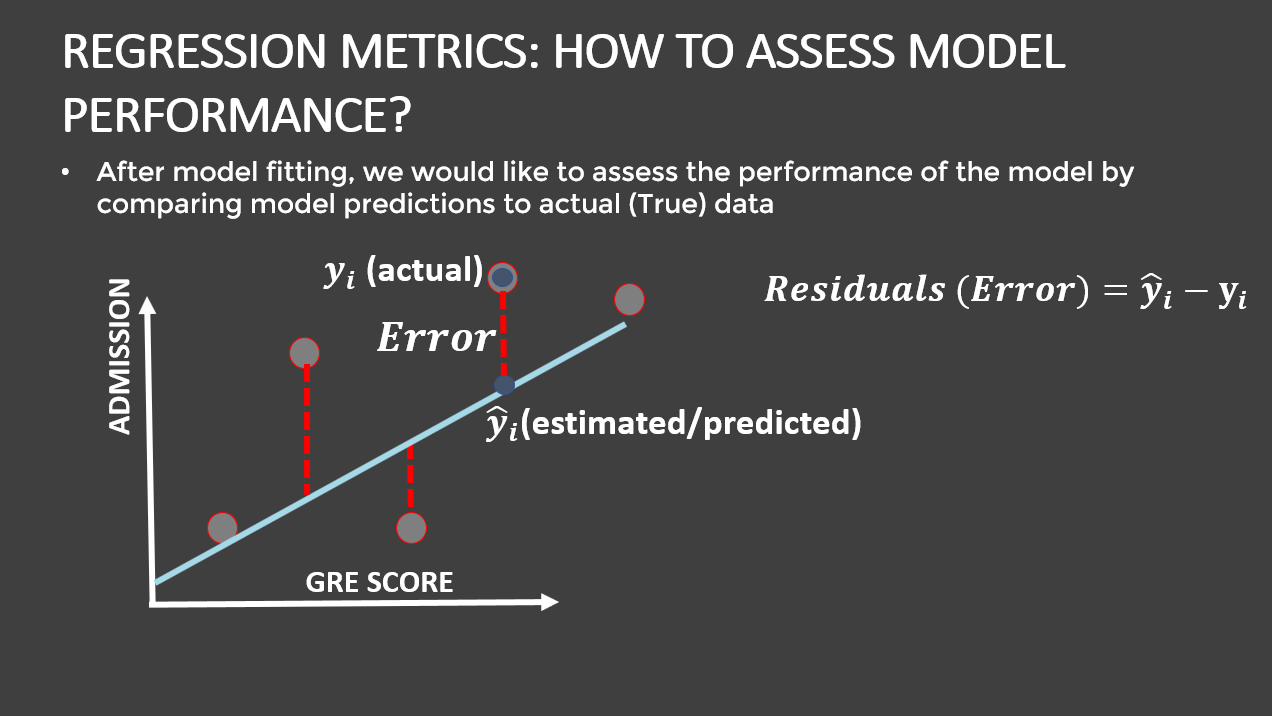

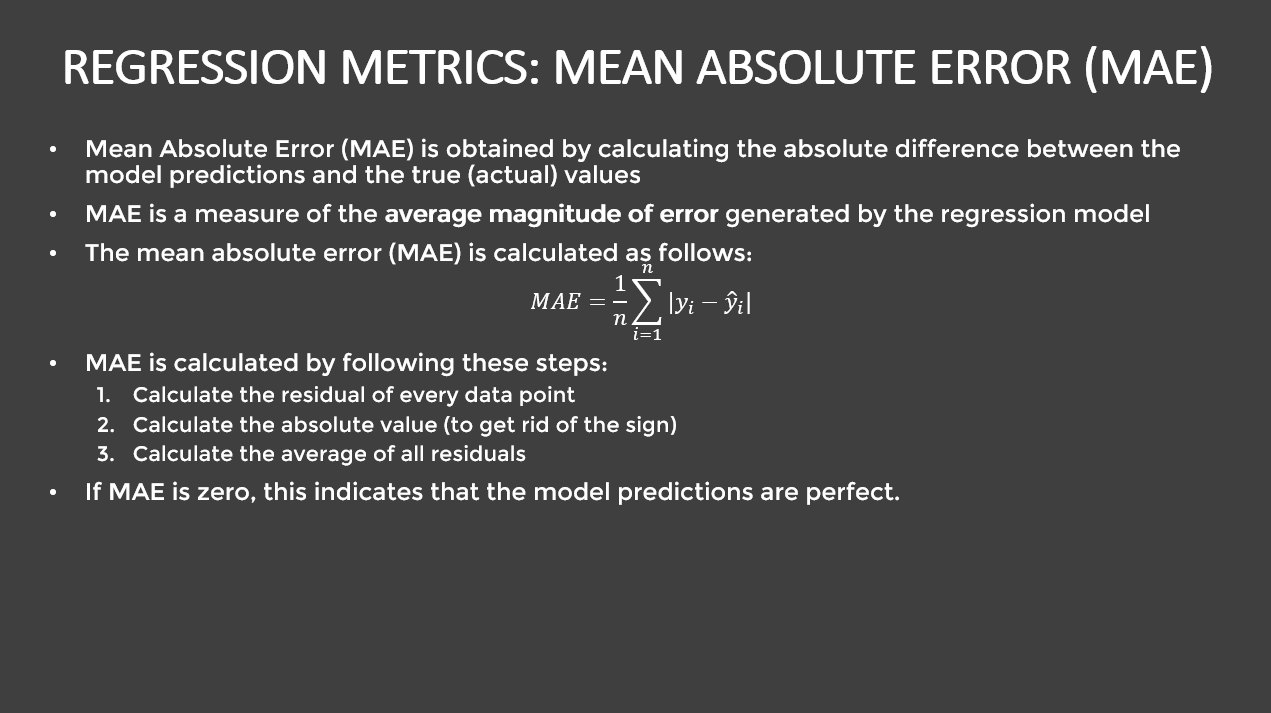

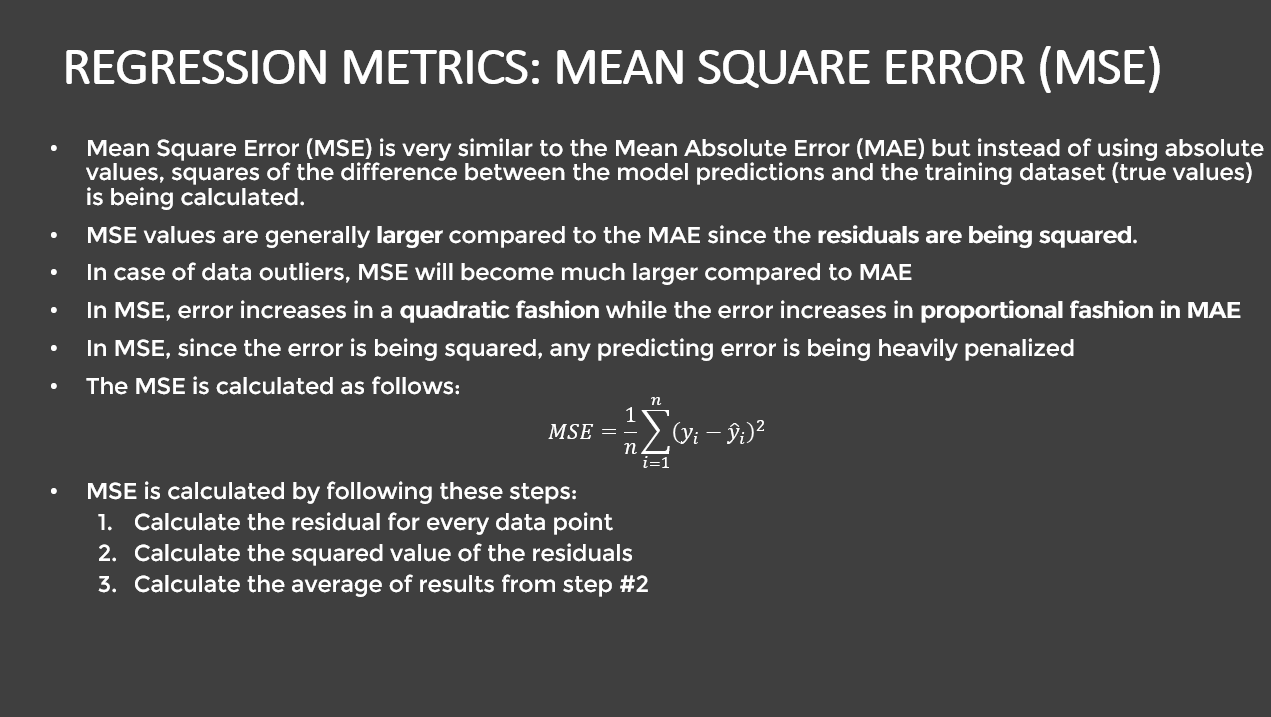

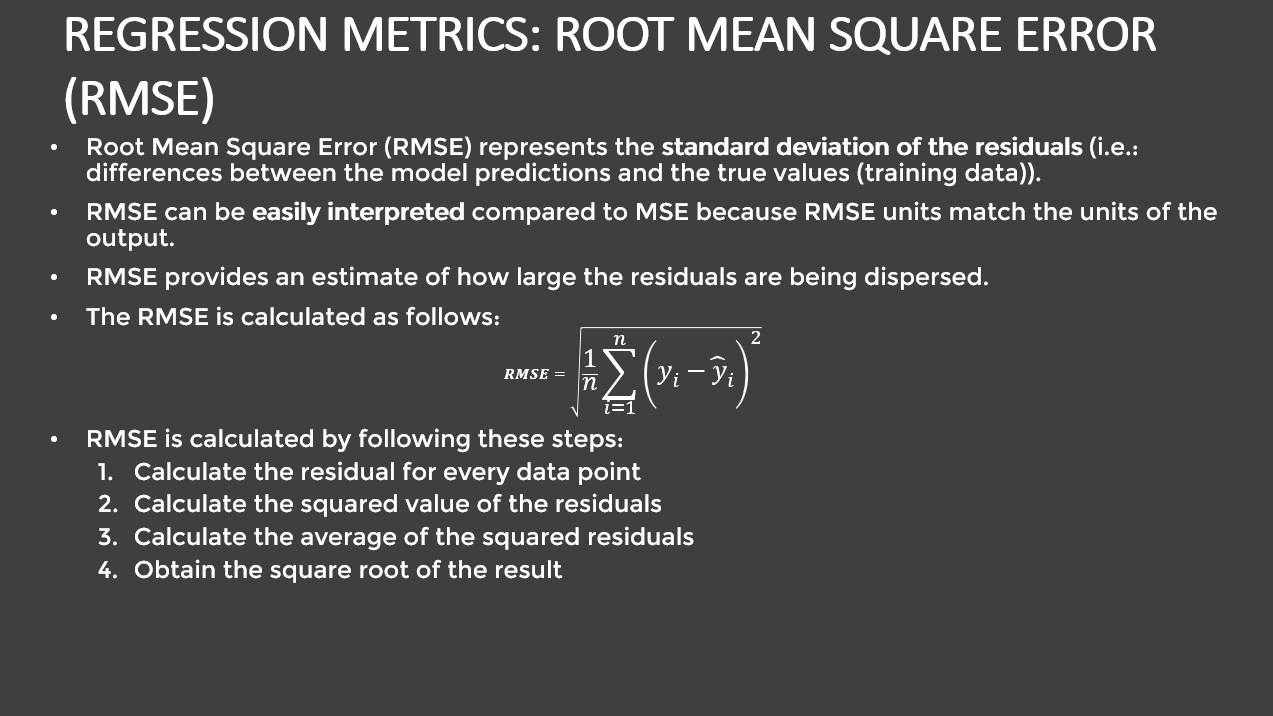

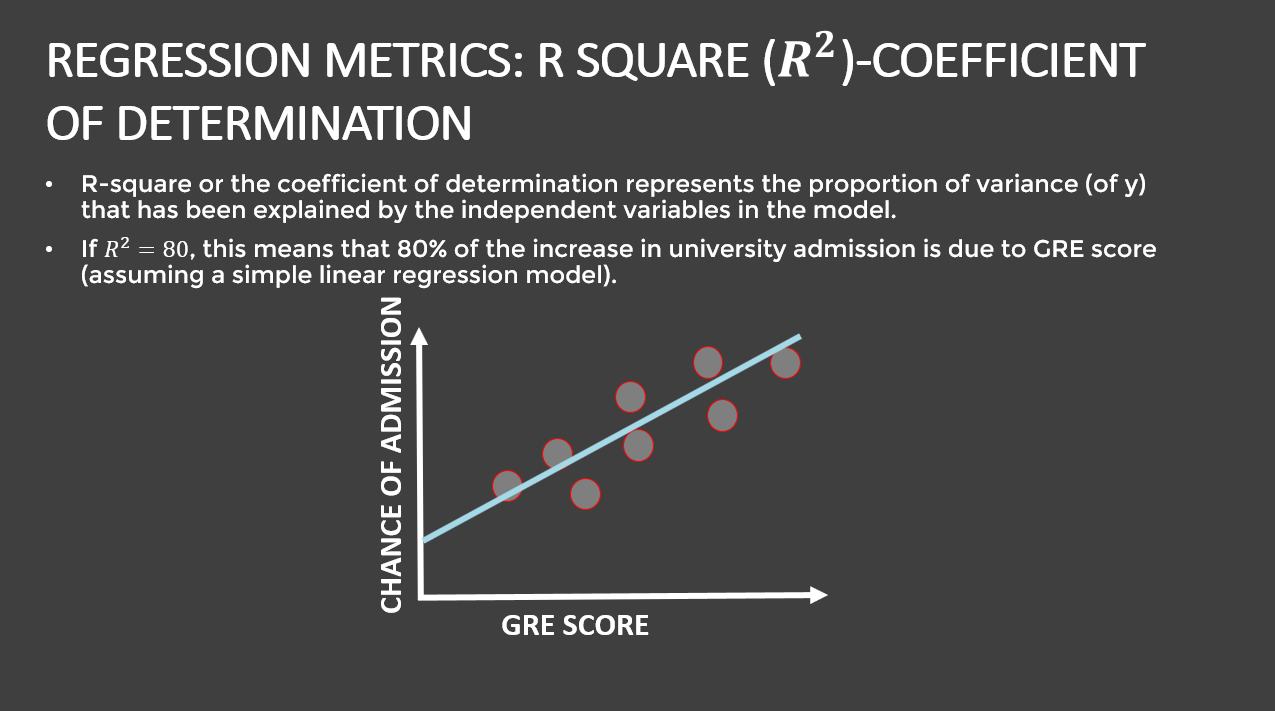

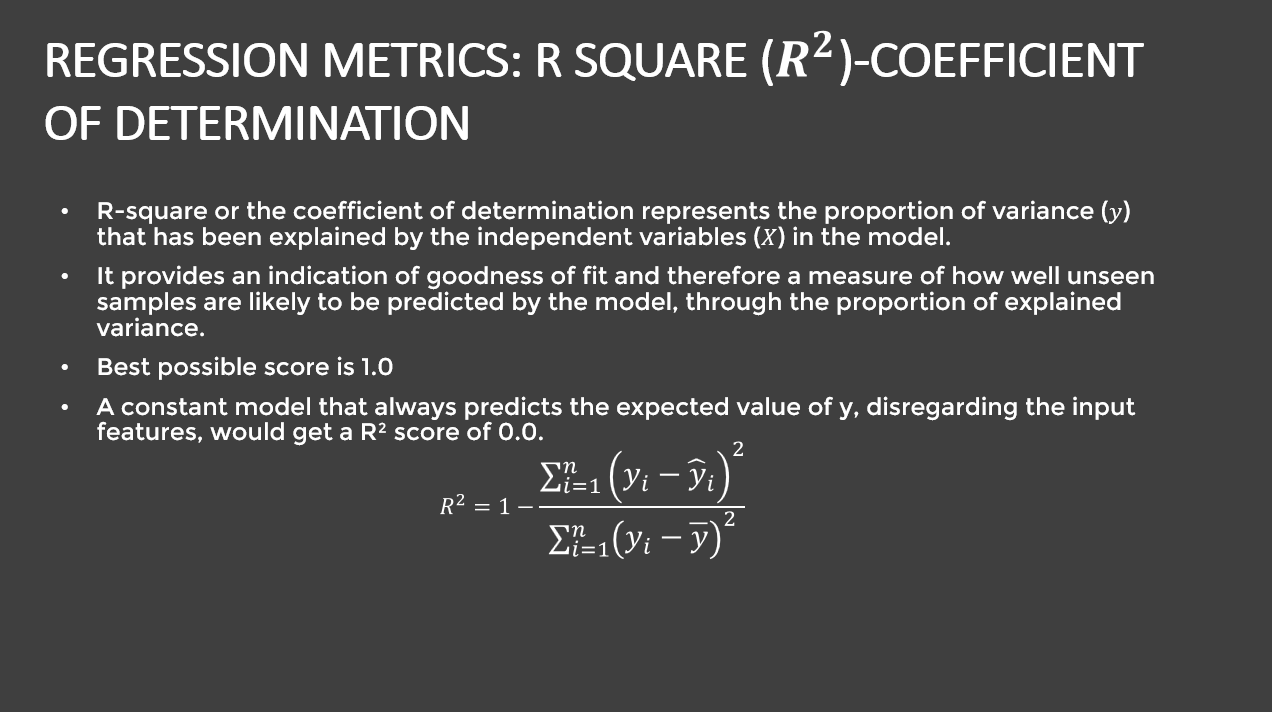

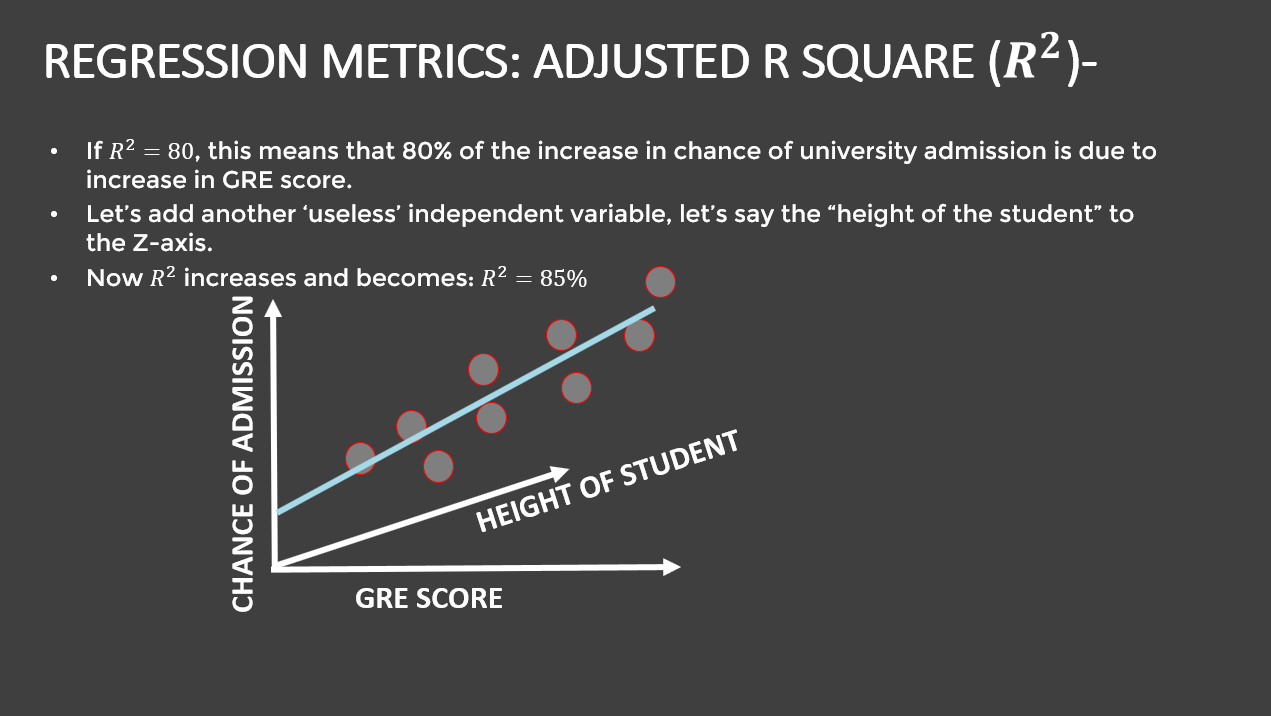

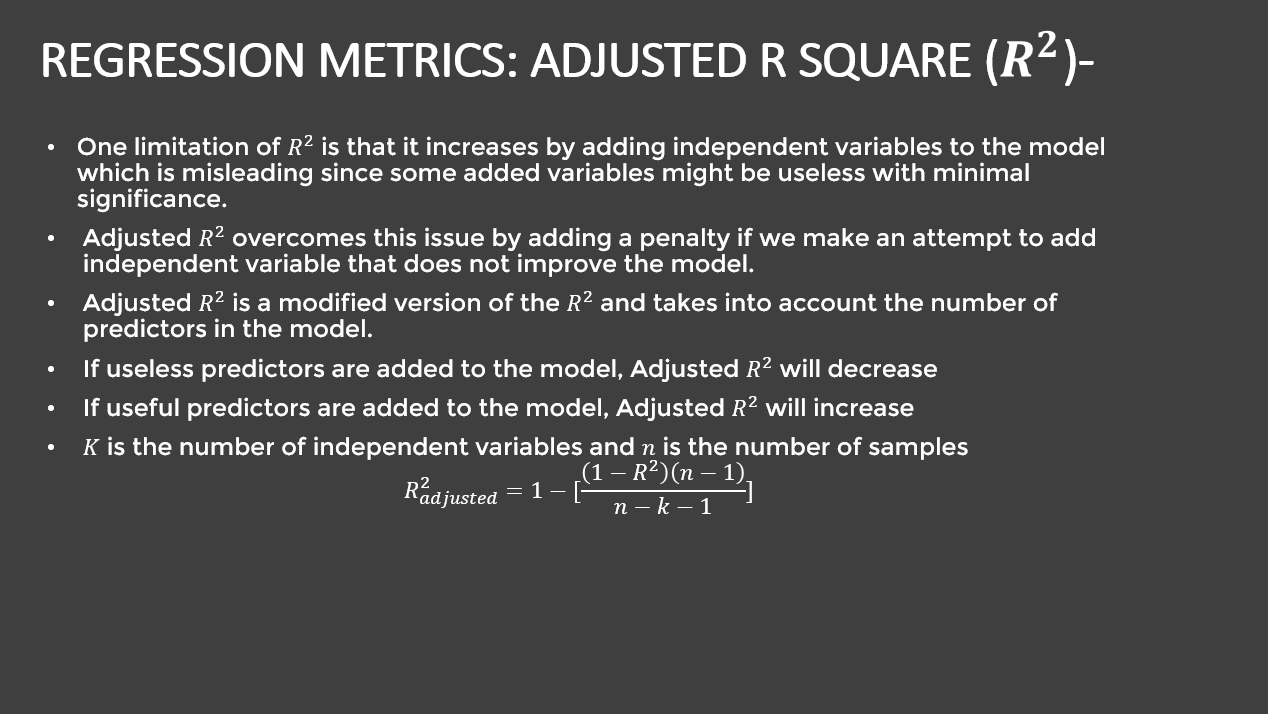

# TASK #10: CALCULATE REGRESSION MODEL KPIs

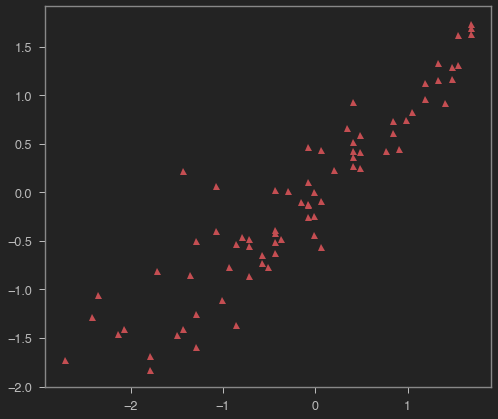

In [80]:
y_predict = LinearRegression_model.predict(X_test)
plt.plot(y_test, y_predict, '^',color='r')

In [81]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)

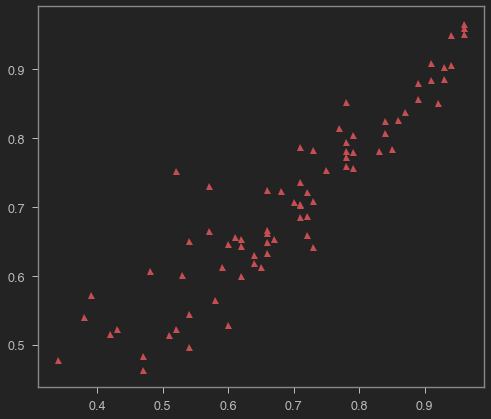

In [82]:
plt.plot(y_test_orig, y_predict_orig, '^',color='r')

In [33]:
k = X_test.shape[1]
n = len(X_test)
n

75

In [83]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RMSE = 0.063 
MSE = 0.003945848909474843 
MAE = 0.04241848740898816 
R2 = 0.8355742823715695 
Adjusted R2 = 0.8183954760521812


# EXCELLENT JOB! YOU SHOULD BE PROUD OF YOUR NEWLY ACQUIRED SKILLS